In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from operator import itemgetter
from itertools import groupby
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import joblib

# **Clean Data**

In [ ]:
df=pd.read_csv('re_players_21.csv')
df_prove22 = pd.read_csv('re_players_22.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df['value_eur'].describe()

count    1.372000e+03
mean     1.196057e+06
std      8.156540e+05
min      9.000000e+04
25%      5.500000e+05
50%      1.000000e+06
75%      1.600000e+06
max      4.500000e+06
Name: value_eur, dtype: float64

In [ ]:
#df.head()

In [ ]:
#print(df.columns)

In [ ]:
df.replace("", float("NaN"), inplace=True)
df_prove22.replace("", float("NaN"), inplace=True)
pd.options.display.min_rows = 110
#df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.drop(columns=['club_loaned_from',
                 'nation_jersey_number',
                 'nation_logo_url',
                  'nation_position',
                  'nation_team_id',
                 'player_tags',
                  'goalkeeping_speed',
                 'player_traits',
                 'player_url',
                 'club_name',
                 'league_name',
                 'player_face_url',
                 'club_logo_url',
                 'club_flag_url',
                 'nation_flag_url',
                 'ls', 'st', 'rs',
                 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'
],axis=0, inplace=True)

In [ ]:
df_prove22.drop(columns=['club_loaned_from',
                 'nation_jersey_number',
                 'nation_logo_url',
                  'nation_position',
                  'nation_team_id',
                 'player_tags',
                  'goalkeeping_speed',
                 'player_traits',
                 'player_url',
                 'club_name',
                 'league_name',
                 'player_face_url',
                 'club_logo_url',
                 'club_flag_url',
                 'nation_flag_url',
                 'ls', 'st', 'rs',
                 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'
],axis=0, inplace=True)

In [ ]:
df = df.dropna()
df_prove22 = df_prove22.dropna()
#df.head()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [ ]:
Q1 = df_prove22.quantile(0.25)
Q3 = df_prove22.quantile(0.75)
IQR = Q3 - Q1

df_prove22 = df_prove22[~((df_prove22 < (Q1 - 1.5 * IQR)) |(df_prove22 > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [ ]:
#df

In [ ]:
#df_prove22

In [ ]:
df21 = df[['sofifa_id','value_eur']]
df21 = df21.rename(columns={'value_eur': 'value_eur21'})
df22 = df_prove22[['sofifa_id','value_eur']]
df22 = df22.rename(columns={'value_eur': 'value_eur22'})
#df21['value_eur22'] = df22
#df['id_clear'] = df21['value_eur21'] == df22['value_eur22']

In [ ]:
mergedStuff = pd.merge(df21, df22, on=['sofifa_id'], how='inner')

In [ ]:
mergedStuff['%change'] = (mergedStuff['value_eur22'] - mergedStuff['value_eur21'])*100/mergedStuff['value_eur21']

In [ ]:
mergedStuff.sort_values(by=['%change'],ascending=False)

,sofifa_id,value_eur21,value_eur22,%change
1850,255718,130000.0,1300000.0,900.000000
1754,253139,350000.0,3000000.0,757.142857
1778,246923,350000.0,2900000.0,728.571429
1756,254131,350000.0,2500000.0,614.285714
1792,254789,300000.0,2100000.0,600.000000
1634,251401,525000.0,3500000.0,566.666667
1845,256949,210000.0,1400000.0,566.666667
1556,240019,550000.0,3600000.0,554.545455
1847,243133,150000.0,975000.0,550.000000
1728,252383,375000.0,2300000.0,513.333333


In [ ]:
mergedStuff = mergedStuff[~((mergedStuff ['%change'] <= 10) & (mergedStuff ['%change'] >= -10))]
mergedStuff.head()

,sofifa_id,value_eur21,value_eur22,%change
0,215135,3600000.0,1800000.0,-50.000000
1,178253,3500000.0,2600000.0,-25.714286
2,190607,4500000.0,1900000.0,-57.777778
3,193141,2100000.0,500000.0,-76.190476
4,203872,3500000.0,2000000.0,-42.857143


In [ ]:
mergedStuff = mergedStuff[~(mergedStuff ['value_eur21'] == mergedStuff ['value_eur22'])]
#mergedStuff

In [ ]:
df_differentID = mergedStuff[['sofifa_id']]
#df_differentID

In [ ]:
df_dummy = pd.merge(df, df_differentID, on=['sofifa_id'], how='inner')
df_dummy.head()
df = df_dummy

In [ ]:
#df.isnull().sum() #All zero

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.559139,0.215845,-0.182530,-0.375672,-0.744971,-0.057021,-0.139730,0.051294,nan,0.228716,0.252555,0.041406,nan,-0.241050,nan,-0.248119,-0.046661,-0.263918,-0.393721,-0.295638,-0.263194,-0.445718,-0.325691,-0.185601,-0.329519,-0.331782,-0.258658,-0.219573,-0.335134,-0.314675,-0.309349,-0.359533,-0.026164,-0.062292,-0.213173,-0.533688,-0.052929,-0.319678,-0.290247,-0.388424,-0.329892,-0.294266,-0.365805,-0.272980,-0.257170,-0.278865,-0.236677,-0.504098,-0.260287,-0.210215,-0.181586,-0.079242,-0.146930,-0.106259,-0.098980,-0.093656
overall,-0.559139,1.000000,0.296593,0.760280,0.636153,0.597389,0.077313,0.190429,0.015358,nan,-0.204113,-0.089015,-0.020294,nan,0.334198,nan,0.727876,0.233196,0.346521,0.581416,0.550029,0.377666,0.609296,0.456208,0.251443,0.464654,0.610814,0.290510,0.459729,0.401805,0.325975,0.448728,0.654896,0.198318,0.243452,0.279561,0.779270,0.043726,0.444581,0.321996,0.577993,0.450121,0.361923,0.477089,0.367347,0.343918,0.387063,0.261420,0.701401,0.372381,0.312909,0.288872,0.064697,0.104516,0.041580,0.049912,0.042903
potential,0.215845,0.296593,1.000000,0.619055,0.243236,-0.471555,-0.007840,-0.051064,-0.146656,nan,0.185422,0.171582,-0.023192,nan,0.140691,nan,0.489185,0.179279,0.078298,0.159632,0.257593,0.050562,-0.008669,0.075549,0.059887,0.059745,0.221996,0.072849,0.246821,0.115609,0.037961,0.121990,0.258272,0.175464,0.165048,0.132469,0.129115,0.074046,0.122350,-0.014316,0.048972,-0.051678,0.066761,0.035433,0.024144,0.054389,0.120315,0.030771,0.191641,0.054043,0.051126,0.053902,-0.024433,-0.046770,-0.038147,-0.027659,-0.065333
value_eur,-0.182530,0.760280,0.619055,1.000000,0.599599,0.082856,0.023009,0.082358,-0.047532,nan,-0.050131,0.049492,0.005533,nan,0.305350,nan,0.877753,0.266267,0.274866,0.465738,0.496811,0.232982,0.376855,0.327055,0.210500,0.288812,0.527747,0.231099,0.430357,0.303949,0.210245,0.370174,0.565014,0.247463,0.257972,0.256569,0.559442,0.079308,0.351054,0.191047,0.420150,0.252775,0.267891,0.292005,0.218021,0.273403,0.322689,0.175811,0.507788,0.240891,0.190017,0.173950,0.021607,0.056614,-0.022501,0.001615,0.001102
wage_eur,-0.375672,0.636153,0.243236,0.599599,1.000000,0.361364,0.076668,0.152684,-0.085648,nan,-0.010722,-0.003054,-0.088780,nan,0.229407,nan,0.649524,0.092850,0.262472,0.416862,0.365539,0.240137,0.372094,0.299612,0.190502,0.352444,0.447081,0.239707,0.315766,0.287222,0.234336,0.336245,0.459814,0.066555,0.105251,0.114897,0.504576,-0.000860,0.332591,0.167348,0.313738,0.276240,0.270436,0.331068,0.219422,0.251504,0.285991,0.219020,0.458700,0.229657,0.203886,0.182960,0.026047,0.087194,0.009012,0.051927,0.025099
age,-0.744971,0.597389,-0.471555,0.082856,0.361364,1.000000,0.054129,0.202442,0.147929,nan,-0.288209,-0.234534,0.040160,nan,0.173095,nan,0.203489,-0.013951,0.230527,0.357553,0.249524,0.285784,0.511218,0.302218,0.163678,0.376470,0.335167,0.196946,0.183574,0.250078,0.269754,0.277497,0.343530,-0.039489,0.011069,0.107142,0.567209,-0.032673,0.271151,0.295535,0.391885,0.421441,0.254722,0.391438,0.291401,0.244291,0.231896,0.238353,0.460016,0.27

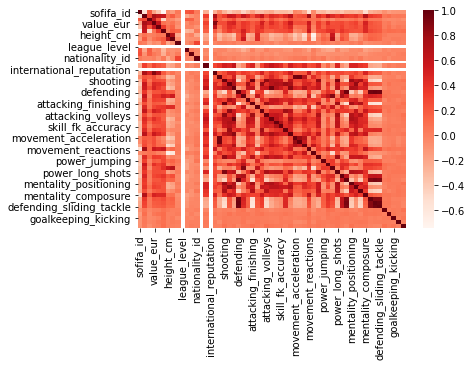

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(), cmap='Reds') # heat map for analysis
plt.figure()
corr = df.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

#df.head()

In [ ]:
cor_matrix = df.corr().abs()
#print(cor_matrix)

In [ ]:
cor_matrix = df.corr()['value_eur']
#cor_matrix

In [ ]:
df_cor = cor_matrix[(cor_matrix >0.3) & (cor_matrix < 0.95)]
df_cor.sort_values(ascending=False)

release_clause_eur         0.877753
overall                    0.760280
potential                  0.619055
wage_eur                   0.599599
skill_ball_control         0.565014
movement_reactions         0.559442
attacking_short_passing    0.527747
mentality_composure        0.507788
dribbling                  0.496811
passing                    0.465738
skill_dribbling            0.430357
power_stamina              0.420150
physic                     0.376855
skill_long_passing         0.370174
power_shot_power           0.351054
attacking_crossing         0.327055
mentality_vision           0.322689
skill_moves                0.305350
skill_curve                0.303949
Name: value_eur, dtype: float64

In [ ]:
df_x = []
for col in df_cor.index:
    #print(col)
    df_x.append(col)
df_x

['overall',
 'potential',
 'wage_eur',
 'skill_moves',
 'release_clause_eur',
 'passing',
 'dribbling',
 'physic',
 'attacking_crossing',
 'attacking_short_passing',
 'skill_dribbling',
 'skill_curve',
 'skill_long_passing',
 'skill_ball_control',
 'movement_reactions',
 'power_shot_power',
 'power_stamina',
 'mentality_vision',
 'mentality_composure']

In [ ]:
df_x = df[df_x]
#df_x

In [ ]:
data_y = df[['value_eur']]
#data_y

In [ ]:
scaler = StandardScaler()
# transform data
data_x = scaler.fit_transform(df_x)
data_x

array([[ 2.23191002,  1.0759848 ,  3.4025217 , ..., -1.56877437,
        -2.19841658,  0.24396706],
       [ 2.03527606,  0.86925589,  2.88885864, ...,  2.24159695,
         2.23291395,  0.24396706],
       [ 2.03527606,  0.86925589,  1.34786946, ...,  0.13586543,
         1.57292855,  1.88937415],
       ...,
       [-3.0772067 , -1.61149103, -0.83519854, ..., -1.06740972,
        -0.5955949 , -1.40144002],
       [-3.27384065, -3.26532231, -0.82235696, ..., -0.86686386,
        -1.16129667, -1.75402725],
       [-3.27384065, -1.40476212, -0.70678277, ..., -1.56877437,
        -1.2555803 , -2.10661449]])

In [ ]:
data_y_tran = scaler.fit_transform(data_y)

#data_y_tran

# **Train model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y_tran, test_size = 0.3,random_state=15000,shuffle = True)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train.shape, y_train.shape

((960, 19), (960, 1))

In [ ]:
y_pred = lm.predict(X_test)
lm.score(X_test,y_test)

print("Coefficient =", lm.coef_)
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(y_test, y_pred))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred))))
print('Mean Absolute error: %.2f' % (mean_absolute_error(y_test, y_pred)))

Coefficient = [[ 0.22660422  0.27439663  0.00058021  0.01036745  0.55014467 -0.3971422
   0.2313657   0.02163469  0.11226442  0.14718767 -0.11270903  0.02714582
   0.08822972 -0.04319486  0.00597026  0.01388964  0.04246835  0.07486681
  -0.04512228]]
Coefficient of determination: 0.86 (The best case is 1)
Root Mean squared error: 0.37
Mean Absolute error: 0.27


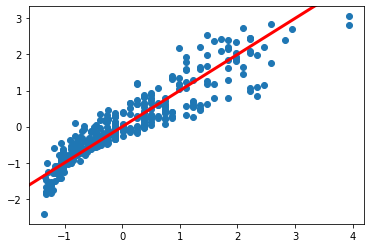

In [ ]:
plt.scatter(y_test, y_pred)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,  color='r', lw=3, scalex=False, scaley=False) #x=y
plt.show()

In [ ]:
regressor = SVR(kernel = 'linear')
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_svm = regressor.predict(X_test)
#y_pred_svm
#y_pred_svm = data_y_tran.inverse_transform(y_pred_svm) 

In [ ]:
#print("Coefficient =", regressor.coef_)
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(y_test, y_pred_svm))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred_svm))))
print('Mean Absolute error: %.2f' % (mean_absolute_error(y_test, y_pred_svm)))

Coefficient of determination: 0.86 (The best case is 1)
Root Mean squared error: 0.38
Mean Absolute error: 0.26


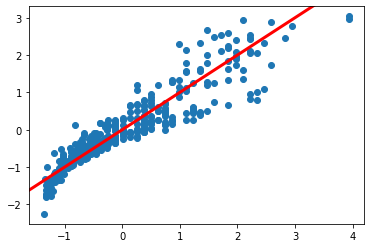

In [ ]:
plt.scatter(y_test, y_pred_svm)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,  color='r', lw=3, scalex=False, scaley=False) #x=y
plt.show()

ข้อมูลอยู่ใต้กราฟ = ค่าจริงมากกว่าค่าทำนาย


ข้อมูลเหนือกราฟ =  ค่าจริงน้อยกว่าที่ทำนาย

# **SAVE model**

In [ ]:
# Save the model as a pickle in a file
joblib.dump(regressor, 'SVR_model.pkl')
joblib.dump(lm, 'L_model.pkl')

['L_model.pkl']

# **Apply model**

In [ ]:
df_apply=pd.read_csv('re_players_22.csv')
df_apply.replace("", float("NaN"), inplace=True)
#df_apply.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_apply_clean = []
for col in df_cor.index:
    #print(col)
    df_apply_clean.append(col)
df_apply_clean.append('value_eur')
#df_apply_clean

In [ ]:
df_apply_clean = df_apply[df_apply_clean]
#df_apply_clean.head()

In [ ]:
#df_apply_clean.isnull().sum().sort_values(ascending=False)

In [ ]:
df_apply_clean = df_apply_clean.dropna()
#df_apply_clean.head()

In [ ]:
#df_apply_clean.isnull().sum().sort_values(ascending=False)

In [ ]:
df_apply_x = df_apply_clean.drop('value_eur', 1)
#df22_x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_apply_y = df_apply_clean[['value_eur']]
#df_apply_y.head()

In [ ]:
data_apply_x = scaler.fit_transform(df_apply_x)
#data_apply_x

In [ ]:
data_apply_y = scaler.fit_transform(df_apply_y)
#data_apply_y

In [ ]:
 # Load the model from the file
svr_from_joblib = joblib.load('SVR_model.pkl')
#svr_from_joblib

In [ ]:
score = svr_from_joblib.score(data_apply_x, data_apply_y)  # Calculate the Score 
print("Test score: {0:.2f} %".format(100 * score))  # Print the Score

# Predict the Labels using the reloaded Model
y22_predict =svr_from_joblib.predict(data_apply_x)  
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(data_apply_y, y22_predict))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(data_apply_y, y22_predict))))
print('Mean Absolute error: %.2f' % (mean_absolute_error(data_apply_y, y22_predict)))
#y22_predict

Test score: 84.19 %
Coefficient of determination: 0.84 (The best case is 1)
Root Mean squared error: 0.40
Mean Absolute error: 0.28


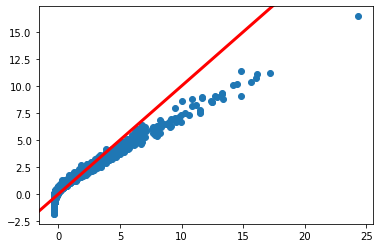

In [ ]:
plt.scatter(data_apply_y, y22_predict)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,  color='r', lw=3, scalex=False, scaley=False) #x=y
plt.show()

In [ ]:
 # Load the model from the file
svr_from_joblib = joblib.load('SVR_model.pkl')
#svr_from_joblib

In [ ]:
score = svr_from_joblib.score(data_apply_x, data_apply_y)  # Calculate the Score 
print("Test score: {0:.2f} %".format(100 * score))  # Print the Score

# Predict the Labels using the reloaded Model
y22_predict =svr_from_joblib.predict(data_apply_x)  
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(data_apply_y, y22_predict))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(data_apply_y, y22_predict))))
print('Mean Absolute error: %.2f' % (mean_absolute_error(data_apply_y, y22_predict)))
#y22_predict

Test score: 84.19 %
Coefficient of determination: 0.84 (The best case is 1)
Root Mean squared error: 0.40
Mean Absolute error: 0.28


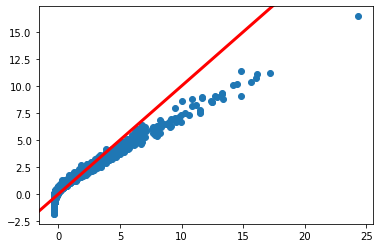

In [ ]:
plt.scatter(data_apply_y, y22_predict)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,  color='r', lw=3, scalex=False, scaley=False) #x=y
plt.show()